In [58]:
import graphviz as gv

#generar el grafo

def drawUF(myList):
    dot = gv.Digraph(comment="UFDS")
    lon = len(myList)
    
    for i in range(lon):
        #agreglo los nodos al grafo (valor, etiqueta que se va a mostrar en el grafo)
        dot.node(str(i), str(i)) #tienen que ser cadenas
        
    for j in range(lon):
        #en la arista pongo (valor del indice, valor del padre)
        if myList[j] >= 0: #Si pondeeracion >= 0
            dot.edge(str(j), str(myList[j]))
    
    dot.graph_attr["rankdir"] = "BT" #que se muestre como arbol binario
    return dot




In [64]:
# Retornará la ponderacion del nodo
def quickUnionPonderado_find(s, a):
    i = a
    while s[i] >= 0:
        i = s[i]
    return i

In [68]:
#En el arreglo "s":
# Los indices del arreglo, son los nodos del grafo: {0,1,2,3,...,9}
# Los elementos del arreglo, son las ponderaciones, inicialmente en -1
def quickUnionPonderado_union(s, a, b): # "s" es el arreglo de ponderaciones
    raizA = quickUnionPonderado_find(s, a) # el i de p | ponderacion de a
    raizB = quickUnionPonderado_find(s, b) # el i de q | ponderacion de b
    print("  pa =",raizA, ",    pb =",raizB)
    if raizA == raizB: return
    print("s[pa]=",s[raizA], ", s[pb]=",s[raizB])
    if s[raizA] < s[raizB]:
        s[raizA] += s[raizB]
        s[raizB] = raizA
        print ("Ponderacion de p < ponderacion de q, entonces, nuevas ponderaciones para la raiz ", raizA,  "p=", s[raizA], "q= ", raizA)
    elif s[raizB] < s[raizA]:
        s[raizB] += s[raizA]
        s[raizA] = raizB
        print ("Ponderacion de p > ponderacion de q, entonces, nuevas ponderaciones para la raiz ", raizB,  "p=", s[raizB], "q= ", raizB)
    else:
        s[raizA] += s[raizB]  # A s[pa] se le aumenta la ponderacion de s[pb]
        s[raizB] = raizA      # A s[pb] se le asigna nodo pa
        print ("Igual ponderacion de p y q, entonces, nuevas ponderaciones", "p=", s[raizA], "q=", s[raizB])

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


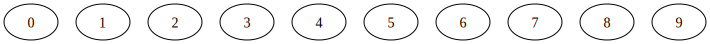

In [72]:
rank = [-1 for i in range(10)]
print(rank) #lista de ponderaciones
#gv.Source(drawUF(s))
dot = drawUF(rank)
dot

  pa = 3 ,    pb = 4
s[pa]= -1 , s[pb]= -1
Igual ponderacion de p y q, entonces, nuevas ponderaciones p= -2 q= 3
[-1, -1, -1, -2, 3, -1, -1, -1, -1, -1]


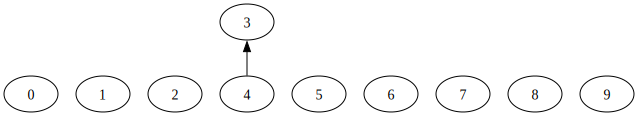

In [74]:

#Unimos 3 y 4, Tienen la misma ponderacion, entonces, la ponderacion de p sera igual a la suma de la ponderacion de p + la ponderacion de q (-1+-1) = -2.  La ponderacion de q es el i de 3 
quickUnionPonderado_union(rank, 3, 4)
print(rank)
#gv.Source(drawUF(s))
dot = drawUF(rank)
dot


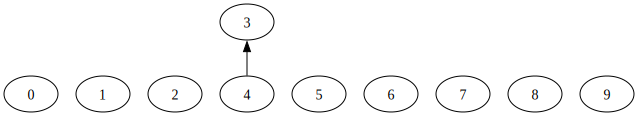

In [75]:
dot = drawUF(rank)
dot